In [1]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

### Data 


In [6]:
merged_df_def = pd.read_csv('C:/Users/perta/Documents/Project Deds/deds_proj_groep1/6_Data/merged_df_def.csv')
merged_df_def

,IDSK,id,cust_id,order_date,region,sales_rep,line_id,prod_id,quantity,ship_date,...,LineTotal,ReceivedQty,RejectedQty,StockedQty,ModifiedDate,OrderID,ProductID_y,UnitPrice_y,Quantity,Discount
0,1,2001,101,14-Mar-1996 12:00:00 AM,Eastern,299,1,300,12,15-Sep-1996 12:00:00 AM,...,135.3600,3.0,0.0,3.0,2011-04-23,10248,42,9.80,10,0.0
1,2,2001,101,14-Mar-1996 12:00:00 AM,Eastern,299,2,301,12,14-Sep-1996 12:00:00 AM,...,136.7415,3.0,0.0,3.0,2011-04-23,10248,72,34.80,5,0.0
2,3,2001,101,14-Mar-1996 12:00:00 AM,Eastern,299,3,302,12,14-Sep-1996 12:00:00 AM,...,8847.3000,550.0,0.0,550.0,2011-04-23,10249,14,18.60,9,0.0
3,4,2002,102,18-Mar-1996 12:00:00 AM,Eastern,467,1,400,24,18-Sep-1996 12:00:00 AM,...,171.0765,2.0,1.0,1.0,2011-04-23,10249,51,42.40,40,0.0
4,5,2002,102,18-Mar-1996 12:00:00 AM,Eastern,467,2,401,24,18-Sep-1996 12:00:00 AM,...,20397.3000,550.0,0.0,550.0,2011-05-07,10250,41,7.70,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1099,2652,174,26-Nov-1998 12:00:00 AM,Central,902,2,300,10,01-Dec-1998 12:00:00 AM,...,45558.9750,550.0,0.0,550.0,2013-08-15,10666,29,123.79,36,0.0
1099,1100,2653,102,17-Jan-1999 12:00:00 AM,Eastern,148,1,301,0,17-Oct-1999 12:00:00 AM,...,262.5000,1250.0,0.0,1250.0,2013-08-15,10666,65,21.05,10,0.0
1100,1101,2654,105,26-Feb-1999 12:00:00 AM,South,148,1,301,15,29-Oct-1999 12:00:00 AM,...,262.5000,1188.0,0.0,1188.0,2013-08-15,10667,69,36.00,45,0.2
1101,1102,2654,105,26-Feb-1999 12:00:00 AM,South,148,2,302,3,29-Oct-1999 12:00:00 AM,...,148.9320,3.0,0.0,3.0,2013-08-15,10667,71,21.50,14,0.2


### One hot encoden

In [7]:
columns_to_drop = ['order_date', 'ship_date', 'DueDate', 'ModifiedDate']

merged_df_def.drop(columns=columns_to_drop, inplace=True)

### Horizontaal en verticaal snijden

In [8]:
X = merged_df_def.drop('region', axis=1)
Y = merged_df_def.loc[:, ['region']]
X

,IDSK,id,cust_id,sales_rep,line_id,prod_id,quantity,PurchaseOrderID,PurchaseOrderDetailID,OrderQty,...,UnitPrice_x,LineTotal,ReceivedQty,RejectedQty,StockedQty,OrderID,ProductID_y,UnitPrice_y,Quantity,Discount
0,1,2001,101,299,1,300,12,2,2,3,...,45.1200,135.3600,3.0,0.0,3.0,10248,42,9.80,10,0.0
1,2,2001,101,299,2,301,12,2,3,3,...,45.5805,136.7415,3.0,0.0,3.0,10248,72,34.80,5,0.0
2,3,2001,101,299,3,302,12,3,4,550,...,16.0860,8847.3000,550.0,0.0,550.0,10249,14,18.60,9,0.0
3,4,2002,102,467,1,400,24,4,5,3,...,57.0255,171.0765,2.0,1.0,1.0,10249,51,42.40,40,0.0
4,5,2002,102,467,2,401,24,5,6,550,...,37.0860,20397.3000,550.0,0.0,550.0,10250,41,7.70,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1099,2652,174,902,2,300,10,494,1100,550,...,82.8345,45558.9750,550.0,0.0,550.0,10666,29,123.79,36,0.0
1099,1100,2653,102,148,1,301,0,495,1101,1250,...,0.2100,262.5000,1250.0,0.0,1250.0,10666,65,21.05,10,0.0
1100,1101,2654,105,148,1,301,15,495,1102,1250,...,0.2100,262.5000,1188.0,0.0,1188.0,10667,69,36.00,45,0.2
1101,1102,2654,105,148,2,302,3,496,1103,3,...,49.6440,148.9320,3.0,0.0,3.0,10667,71,21.50,14,0.2


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.15,
    random_state=42
)

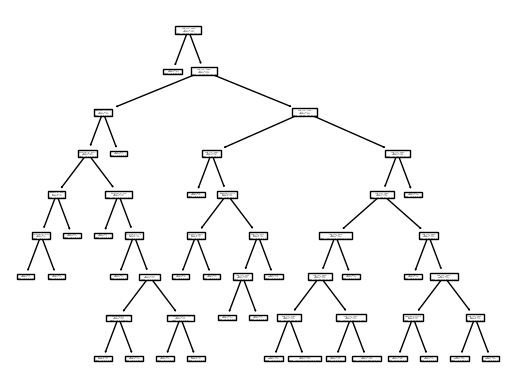

In [18]:
dtree = DecisionTreeClassifier(max_depth=8)
dtree = dtree.fit(X_train, Y_train)
tree.plot_tree(dtree, feature_names= X.columns)
plt.show()

In [19]:
predicted_df = pd.DataFrame(dtree.predict(X_test))
predicted_df = predicted_df.rename(columns={0: 'Predicted_Region'})
model_results_frame = pd.concat([Y_test.reset_index()['region'], predicted_df], axis=1)
model_results_frame

,region,Predicted_Region
0,Eastern,Central
1,Central,Central
2,Western,Western
3,South,Central
4,Eastern,Eastern
...,...,...
161,Central,Central
162,Eastern,Central
163,Eastern,Central
164,Eastern,Eastern


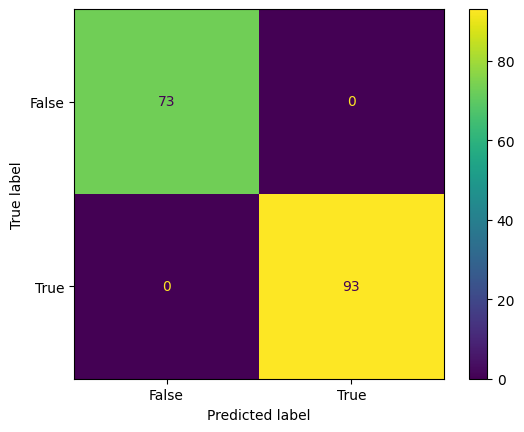

In [20]:
model_results_frame['correctPredicted'] = model_results_frame['region'] == model_results_frame['Predicted_Region']

confusion_matrix = metrics.confusion_matrix(model_results_frame['correctPredicted'], model_results_frame['correctPredicted'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [21]:
metrics.accuracy_score(model_results_frame['region'], model_results_frame['Predicted_Region'])

0.5602409638554217